# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
data_set=pd.read_csv("car data.csv")
print(data_set.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [3]:
data_set.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

# Summary of Dataset

In [4]:
data_set.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Checking Null Values

In [5]:
data_set.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Checking differnt types of unique species

In [6]:
print(data_set.duplicated().sum())
data_set=data_set.drop_duplicates()
data_set.duplicated().sum()

2


0

# Data Visualization

## outliners

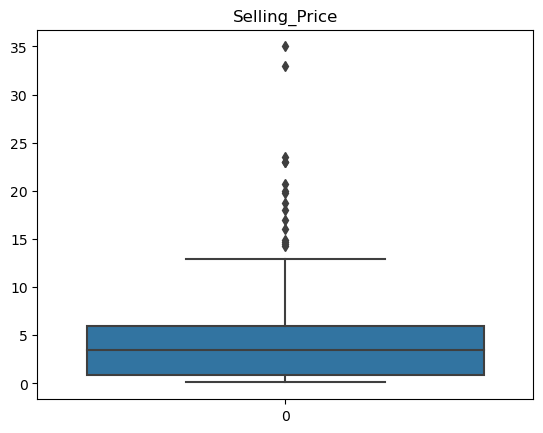

In [7]:
sns.boxplot(data_set['Selling_Price'])
plt.title('Selling_Price')
plt.show()

## HeatMap

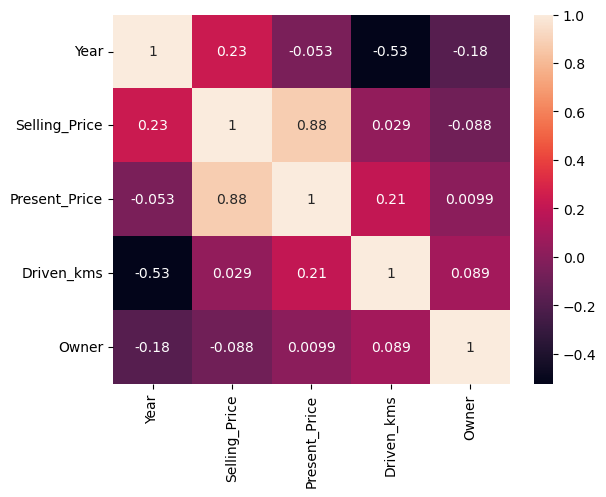

In [8]:
numeric_data=data_set[['Year','Selling_Price','Present_Price','Driven_kms','Owner']]
correlation_matrix=numeric_data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

# displot(numeric features)

C:\Users\jhans\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


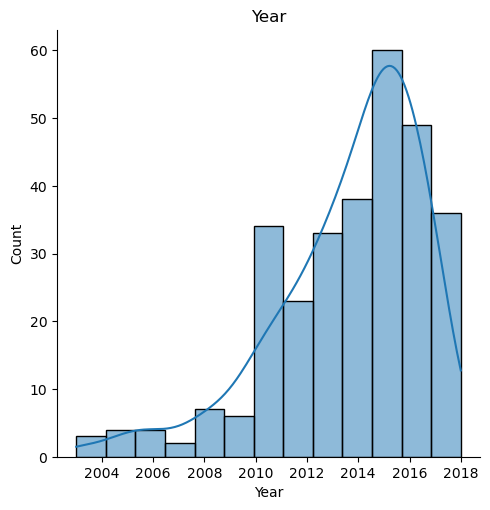

C:\Users\jhans\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


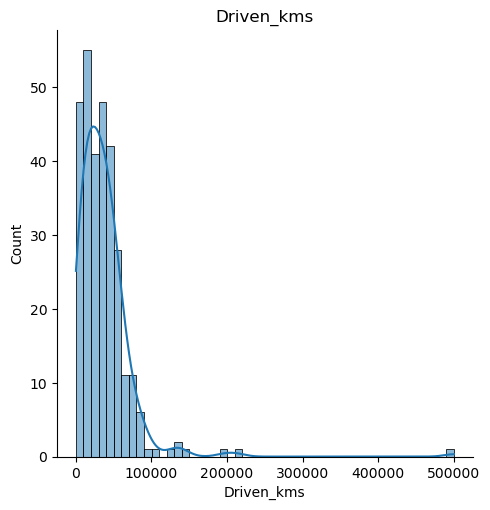

C:\Users\jhans\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


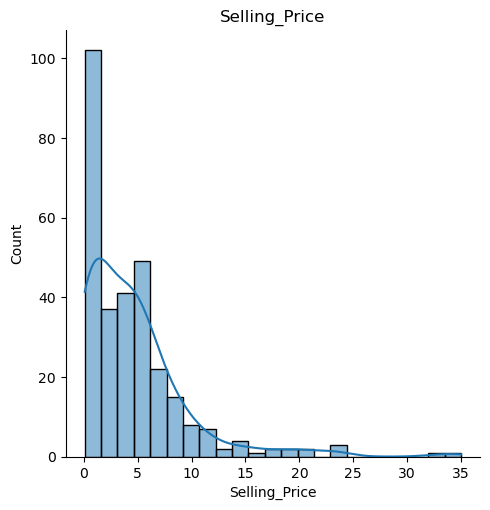

C:\Users\jhans\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


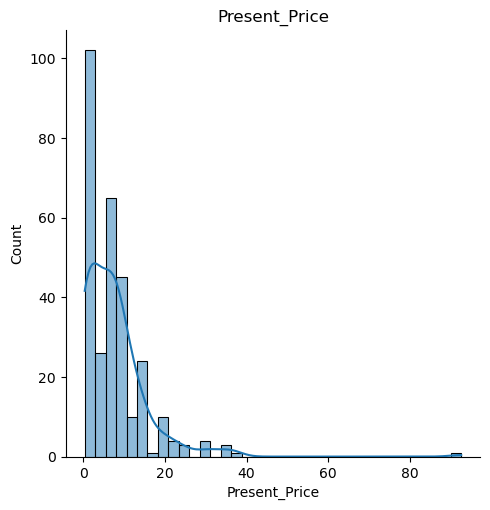

In [9]:
nf=['Year','Driven_kms','Selling_Price','Present_Price']
for i in nf:
    sns.displot(data=data_set,x=i,kde=True)
    plt.title(i)
    plt.show()

# Data Transforming

In [10]:
print(data_set['Fuel_Type'].value_counts())
print(data_set['Selling_type'].value_counts())
print(data_set['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [11]:
data_set.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data_set.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
data_set.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
data_set.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Prediction

In [14]:
x=data_set.drop(['Car_Name','Selling_Price'],axis=1)
y=data_set['Selling_Price']

In [15]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [16]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
226  2015           5.70       24678          0             0             0   
69   2016          20.91       12000          0             0             0   
224  2013           9.40       36198          0             0             1   
38   2016           3.76       10079          0             0             0   
16   2015          10.79       41678          1             0             0   
..    ...            ...         ...        ...           ...           ...   
190  2008           0.75       60000          0             1             0   
72   2013          18.61       56001          0             0             0   
108  2016           1.50       18000          0             1             0   
272  2015          10.00       27600          0             0             0   
104  2017           1.47        4100          0             1             0   

     Owner  
226      0  
69       0  
224      0  

In [19]:
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=classifier.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse,r2)
classifier.score(x_test, classifier.predict(x_test))

5.409372486892028 0.767342919426246


1.0

In [22]:
k=classifier.predict([[2022, 20000 ,0, 1,1,0,0]])
print(k[0])

8808.977328251307


C:\Users\jhans\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
